In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

/home/noname/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

--2025-10-16 03:05:28--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: ‘course_lead_scoring.csv’

course_lead_scoring 100%[===================>]  78,98K  --.-KB/s    in 0,01s   

2025-10-16 03:05:28 (7,70 MB/s) - ‘course_lead_scoring.csv’ saved [80876/80876]



In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not.

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


In [5]:
data = pd.read_csv("course_lead_scoring.csv", sep=",")
data.head(10)

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1
5,events,manufacturing,1,59904.0,NaN,africa,6,0.83,1
6,social_media,technology,0,51283.0,NaN,middle_east,2,0.57,0
7,social_media,NaN,5,62975.0,student,europe,4,0.62,1
8,referral,healthcare,4,38648.0,unemployed,south_america,2,0.86,1
9,paid_ads,other,3,59866.0,student,australia,3,0.43,1


In [4]:
data.isnull().sum(axis = 0)

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [18]:
data[['lead_source', 'industry', 'employment_status', 'location']] = data[['lead_source', 'industry', 'employment_status', 'location']].fillna('NA')

In [19]:
data['annual_income'] = data['annual_income'].fillna(0.0)

In [20]:
data.isnull().sum(axis = 0)

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail` ✅

In [21]:
data.mode()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,organic_search,retail,1,0.0,self_employed,north_america,3,0.6,1


In [22]:
data['industry'].value_counts()

retail           203
finance          200
other            198
healthcare       187
education        187
technology       179
manufacturing    174
NA               134
Name: industry, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset.
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count` ✅

Only consider the pairs above when answering this question.

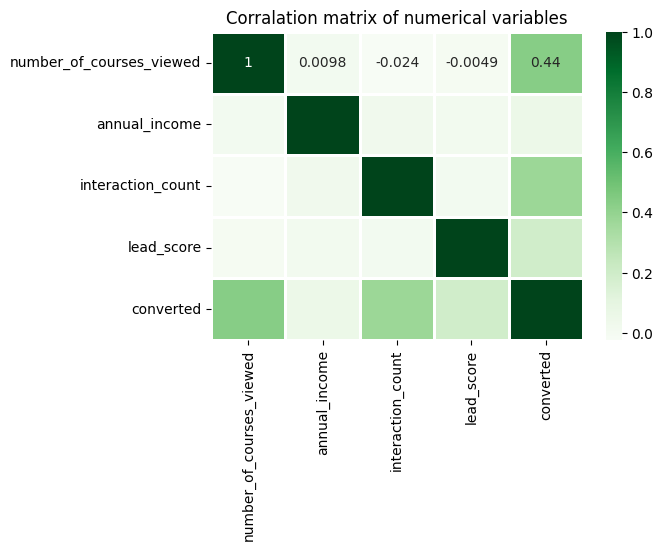

In [23]:
plt.figure(figsize=(6,4))  
sns.heatmap(data.corr(), annot=True, linewidths=.8, cmap="Greens")
plt.title('Corralation matrix of numerical variables')
plt.show()

In [24]:
data.corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score,converted
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879,0.435914
annual_income,0.009770,1.000000,0.027036,0.015610,0.053131
interaction_count,-0.023565,0.027036,1.000000,0.009888,0.374573
lead_score,-0.004879,0.015610,0.009888,1.000000,0.193673
converted,0.435914,0.053131,0.374573,0.193673,1.000000


### Split the data

- Split your data in train/val/test sets with 60%/20%/20% distribution.
- Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
- Make sure that the target value `converted` is not in your dataframe.



In [25]:
y = data['converted']
X = data.drop(columns=['converted'])
X

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94
1,social_media,retail,1,46992.0,employed,south_america,1,0.80
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87
4,referral,education,3,85012.0,self_employed,europe,3,0.62
...,...,...,...,...,...,...,...,...
1457,referral,manufacturing,1,0.0,self_employed,north_america,4,0.53
1458,referral,technology,3,65259.0,student,europe,2,0.24
1459,paid_ads,technology,1,45688.0,student,north_america,3,0.02
1460,referral,NA,5,71016.0,self_employed,north_america,0,0.25


In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

### Question 3

- Calculate the mutual information score between `converted` and other categorical variables in the dataset. Use the training set only.
- Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?

- `industry`
- `location`
- `lead_source` ✅
- `employment_status`

In [27]:
categorical_vars = ['lead_source', 'industry', 'employment_status', 'location']
mutual_inf_calc = []

for cat in categorical_vars:
    mi = round(mutual_info_score(X_train[cat], y_train), 2)
    mutual_inf_calc.append(mi)
    print("For {} the MI with y is: {}".format(cat, mi))


For lead_source the MI with y is: 0.04
For industry the MI with y is: 0.01
For employment_status the MI with y is: 0.01
For location the MI with y is: 0.0


### Question 4

- Now let's train a logistic regression.
- Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
- Fit the model on the training dataset.
  - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
  - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
- Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74 ✅
- 0.84
- 0.94


In [28]:
# OHE
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [29]:
dicts_X_train = X_train[categorical_vars+numerical].to_dict(orient='records')

dv_train = DictVectorizer(sparse=False)

In [30]:
dv_train.fit(dicts_X_train)

DictVectorizer(sparse=False)

In [31]:
X_train_ohe = dv_train.transform(dicts_X_train)


In [32]:
# train the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_ohe, y_train)

val_dict = X_test[categorical_vars + numerical].to_dict(orient='records')
X_val_ohe = dv_train.transform(val_dict)
y_pred = model.predict(X_val_ohe)

#accuracy of the model w/ val
accuracy = np.round(accuracy_score(y_test, y_pred),2)
print(accuracy)

0.73


### Question 5

- Let's find the least useful feature using the _feature elimination_ technique.
- Train a model using the same features and parameters as in Q4 (without rounding).
- Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
- For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'` ✅

> **Note**: The difference doesn't have to be positive.

In [33]:
features = ['industry', 'employment_status', 'lead_score']
accuracies = []

for f in features:
    dicts_X_train_f = X_train.drop(columns=f).to_dict(orient='records')
    dv_train_f = DictVectorizer(sparse=False)
    dv_train_f.fit(dicts_X_train_f)
    X_train_ohe_f = dv_train_f.transform(dicts_X_train_f)
    
    # train the model
    model_f = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model_f.fit(X_train_ohe_f, y_train)

    test_dict_f = X_test.drop(columns=f).to_dict(orient='records')
    X_test_ohe_f = dv_train_f.transform(test_dict_f)
    y_pred_f = model_f.predict(X_test_ohe_f)

    #accuracy of the model w/ val
    accuracy_f = np.round(accuracy_score(y_test, y_pred_f),25)
    accuracies.append(accuracy_f)
    print("removing feat. {}, the accuracy is {}, and the diff. having all feat. is {}:".format(f, accuracy_f, accuracy-accuracy_f))
    

removing feat. industry, the accuracy is 0.7372013651877133, and the diff. having all feat. is -0.0072013651877133045:
removing feat. employment_status, the accuracy is 0.7406143344709898, and the diff. having all feat. is -0.010614334470989806:
removing feat. lead_score, the accuracy is 0.7337883959044369, and the diff. having all feat. is -0.003788395904436914:


### Question 6

- Now let's train a regularized logistic regression.
- Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
- Train models using all the features as in Q4.
- Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01 ✅
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [36]:
y = data['converted']
X = data.drop(columns=['converted'])


#re 
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)


cvalues = [0.01, 0.1, 1, 10, 100]
scores = []

for cval in cvalues:
    dicts_X_train_a = X_train.to_dict(orient='records')
    dv_train_a = DictVectorizer(sparse=False)
    dv_train_a.fit(dicts_X_train_a)
    X_train_ohe_a = dv_train_a.transform(dicts_X_train_a)
    
    # train the model
    model = LogisticRegression(solver='liblinear', C=cval, max_iter=1000, random_state=42)
    model.fit(X_train_ohe, y_train)

    val_dict = X_val[categorical_vars + numerical].to_dict(orient='records')
    X_val_ohe = dv_train.transform(val_dict)
    y_pred = model.predict(X_val_ohe)

    #accuracy of the model w/ val
    accuracy_cval = np.round(accuracy_score(y_val, y_pred), 3)
    scores.append(accuracy_cval)
                    
    print("Accuracy of LogisticRegression with C: {}: {}:".format(cval, accuracy_cval))

    

Accuracy of LogisticRegression with C: 0.01: 0.7:
Accuracy of LogisticRegression with C: 0.1: 0.7:
Accuracy of LogisticRegression with C: 1: 0.7:
Accuracy of LogisticRegression with C: 10: 0.7:
Accuracy of LogisticRegression with C: 100: 0.7:
